In [1]:
import os
import glob
import sys
import vtk

import pandas as pd    
import numpy as np
import matplotlib.pyplot as plt
from vtk.util.numpy_support import vtk_to_numpy

In [2]:
#Include depicted data...
#Case 2 -------------------------- Diameter import
data_Wave= pd.read_csv("./Case_Liu/Wave_Case2.csv", header=None) # Wave_Case2.csv
data_TAB= pd.read_csv("./Case_Liu/TAB_Case2.csv", header=None) # TAB_Case2.csv
data_PDPA= pd.read_csv("./Case_Liu/PDPA_Case2.csv", header=None) # PDPA_Case2.csv

#Case 3 -------------------------- Diameter import
TAB_Case3= pd.read_csv("./Case_Liu/TAB_Case3.csv", header=None) # TAB_Case3.csv
KH_Case3= pd.read_csv("./Case_Liu/Wave_Case3.csv", header=None) # SMD_KH_Case3Experiment.csv
PDPA_Case3= pd.read_csv("./Case_Liu/PDPA_Case3.csv", header=None) # PDPA_Case3.csv

#Case 4 -------------------------- Single droplet breakup
data_C4_SingleD= pd.read_csv("./Case_Liu/Case_4_Single_D.csv", header=None) # Case_4_Single_D.csv
data_C4_SingleRe= pd.read_csv("./Case_Liu/Case4_Single_Re.csv", header=None) # Case4_Single_Re.csv

#Case 2 ------------------------ Trajectory import
TAB_amp00_Traject_Case2= pd.read_csv("./Case_Liu/Trajectories/Case2_TAB_amp0_0.csv", header=None) # Trajectory_TAB_Case2.csv
Wave_Traject_Case2= pd.read_csv("./Case_Liu/Trajectories/Case2_wave_Dynamic.csv", header=None) # Trajectory_Wave_Case2.csv
Wave_st_Traject_Case2= pd.read_csv("./Case_Liu/Trajectories/Case2_Wave_Standard.csv", header=None) # Trajectory_Wave_Case2.csv
Traject_Exp_Case2= pd.read_csv("./Case_Liu/Trajectories/Case2_Experiment.csv", header=None) # Trajectory_Experiment_Case2.csv

#Case 4 -------------------------- Trajectory import
TAB_amp02_Traject_Case4= pd.read_csv("./Case_Liu/Trajectories/Case4_TAB_amp0_2.csv", header=None) # TAB_Traject_Case4.csv
TAB_amp00_Traject_Case4= pd.read_csv("./Case_Liu/Trajectories/Case4_TAB_amp0_0.csv", header=None) # TAB_sc_Traject_Case4.csv
Wave_st_Traject_Case4= pd.read_csv("./Case_Liu/Trajectories/Case4_Wave_Standard.csv", header=None) # Trajectory_Wave_Case4.csv
Wave_Traject_Case4= pd.read_csv("./Case_Liu/Trajectories/Case4_Wave_Dynamic.csv", header=None) # Trajectory_Wave_Case4.csv
Traject_Exp_Case4= pd.read_csv("./Case_Liu/Trajectories/Case4_Experiment.csv", header=None) # Trajectory_Experiment_Case4.csv

#Case 4 -------------------------- ReD import
data_Wave= pd.read_csv("./Case_Liu/Wave_Case2.csv", header=None) # Wave_Case2.csv


In [3]:
fdir = "../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud"#./Case2/TAB/lagrangian/sprayCloud" # sprayCloud file of Case 
#check if directory exists
if not os.path.exists(fdir):
    print('Error: Path does not exist:', fdir)
    sys.exit()

In [4]:
# create reader
reader = vtk.vtkXMLPolyDataReader() # a class that reads an XML-based VTK file format that contains polygonal data
# -------------------------------------------------------------------
points =[]
point_data=[]
point_d = []
point_d0 = [];
#loop over all vtp files
for fname in sorted(glob.glob(os.path.join(fdir, '*.vtp'))): # fdir in where vtp files stored 
    print('Reading:', fname)
    reader.SetFileName(fname)
    reader.Update()

    # print the arrays
    data = (reader.GetOutput())
    point_data.append(data.GetPointData())
    point_d.append(vtk_to_numpy((data.GetPointData()).GetArray('d')))
    point_d0.append(vtk_to_numpy((data.GetPointData()).GetArray('d0')))    
    points.append((vtk_to_numpy(data.GetPoints().GetData())))

Reading: ../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud/sprayCloud_5107.vtp
Reading: ../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud/sprayCloud_5122.vtp
Reading: ../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud/sprayCloud_5137.vtp
Reading: ../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud/sprayCloud_5152.vtp
Reading: ../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud/sprayCloud_5167.vtp
Reading: ../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud/sprayCloud_5182.vtp
Reading: ../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud/sprayCloud_5197.vtp
Reading: ../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud/sprayCloud_5212.vtp
Reading: ../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud/sprayCloud_5227.vtp
Reading: ../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud/sprayCloud_5242.vtp
Reading: ../secondaryBreakupBenz-Case4_KH/VTK/lagrangian/sprayCloud/sprayCloud_5257.vtp
Reading: ../secondaryBreakupBenz

In [5]:
d0 =[];
for i in range(0, len(points)):
    d0.append(np.array(point_d0[i]))
d0=np.concatenate(d0,axis=0)

In [6]:
px=[]
py=[]
pz=[]
for i in range(0, len(points)):
    px.append(np.array(points[i][:,0]))
    py.append(np.array(points[i][:,1]))
    pz.append(np.array(points[i][:,2]))
    

In [7]:
diameter =[]
Reyn =[]
diameter0=[]
for i in range(0, len(points)):
    diameter.append(np.array(point_d[i]))
#     Reyn.append(np.array(Re[i]))
    diameter0.append(np.array(d0[i]))

In [8]:
diameter_total = np.concatenate( diameter, axis=0 )
px_total = np.concatenate( px, axis=0 )
py_total = np.concatenate( py, axis=0 )
pz_total = np.concatenate( pz, axis=0 )

c = np.column_stack((py_total, pz_total,diameter_total))
c_sorted = c[np.argsort(c[:, 0])]


(0.0, 0.008)

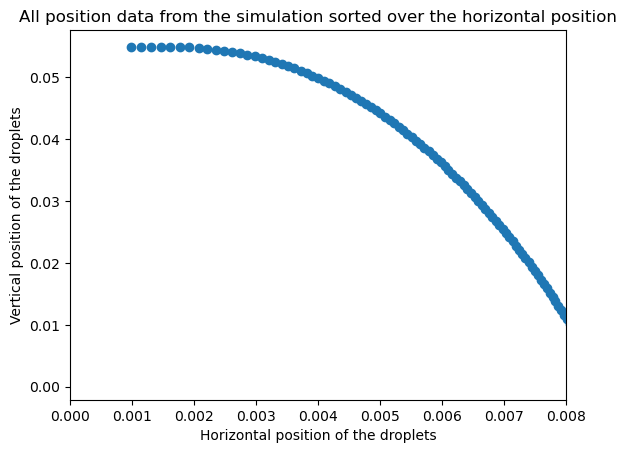

In [9]:
plt.plot(c_sorted[:,0]+0.00572,c_sorted[:,1], 'o')
plt.xlabel('Horizontal position of the droplets')
plt.ylabel('Vertical position of the droplets')
plt.title('All position data from the simulation sorted over the horizontal position')
plt.xlim(0,0.008)

(-0.0072, 0.0057625)

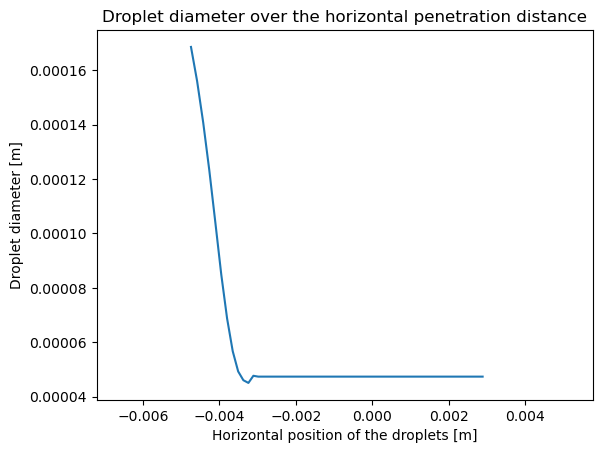

In [10]:
plt.plot(c_sorted[:,0],c_sorted[:,2])
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Droplet diameter [m]')
plt.title('Droplet diameter over the horizontal penetration distance')
plt.xlim(-0.0072,0.0057625)

In [11]:
# Computing the Sauter mean diameter for a specific amount of segments
d3 = pow(c_sorted[:,2],3)
sigma_d3 = sum(d3)
d2 = pow(c_sorted[:,2],2)
sigma_d2 = sum(d2)

 
splitedSize = round(len(c_sorted[:,2])/60)
d3_split = [d3[x:x+splitedSize] for x in range(0, len(d3), splitedSize)]
d2_split = [d2[x:x+splitedSize] for x in range(0, len(d2), splitedSize)]
d_avgsplit = [c_sorted[:,2][x:x+splitedSize] for x in range(0, len(c_sorted[:,2]), splitedSize)]
c_shortx  = [c_sorted[:,0][x:x+splitedSize] for x in range(0, len(c_sorted[:,0]), splitedSize)]
c_shorty  = [c_sorted[:,1][x:x+splitedSize] for x in range(0, len(c_sorted[:,1]), splitedSize)]


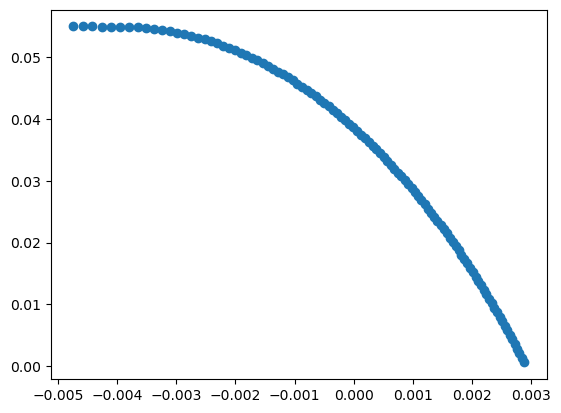

In [12]:
plt.plot(c_sorted[:,0],c_sorted[:,1], 'o')

In [13]:
d32=[];c_avgx =[];c_avgy =[];d_avg =[]

for i in range(0, len(c_shortx)):
    d32.append(sum(d3_split[i])/sum(d2_split[i]))
    c_avgx.append(sum(c_shortx[i])/(len(c_shortx[i])))
    c_avgy.append(sum(c_shorty[i])/(len(c_shorty[i])))
    d_avg.append(sum(d_avgsplit[i])/(len(d_avgsplit[i])))

(0.041, 0.055)

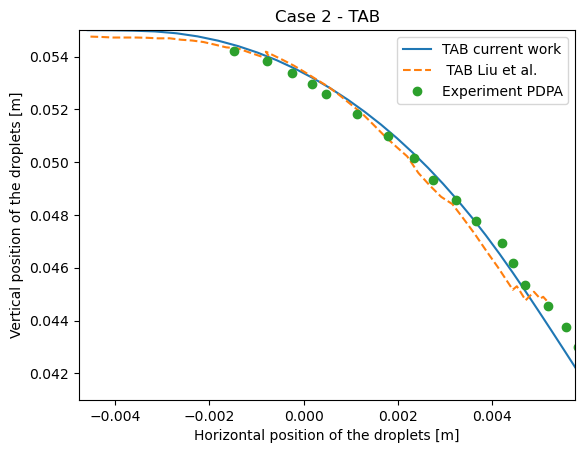

In [26]:
######################################
#####********Case 2 TAB**********#####
######################################

plt.plot(c_avgx,c_avgy, label='TAB current work')
# plt.plot(Wave_st_Traject_Case2.iloc[:,0], Wave_st_Traject_Case2.iloc[:,1], ':',label='Standard Wave Liu et al.')
# Traject_Exp_Case2.iloc[:,0] = Traject_Exp_Case2.iloc[:,0].astype(float)
plt.plot(TAB_amp00_Traject_Case2.iloc[:,0], TAB_amp00_Traject_Case2.iloc[:,1], '--',label=' TAB Liu et al.')
plt.plot(Traject_Exp_Case2.iloc[:,0], Traject_Exp_Case2.iloc[:,1], 'o',label='Experiment PDPA')
plt.legend()
plt.title('Case 2 - TAB')
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Vertical position of the droplets [m]')
plt.xlim(-0.0047625, 0.0057625)
plt.ylim(0.041,0.055)

(0.042, 0.055)

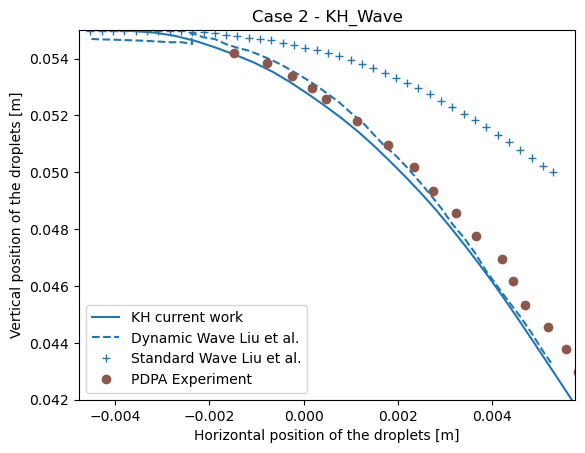

In [14]:
######################################
#####********Case 2 KH***********#####
######################################

plt.plot(c_avgx,c_avgy, label='KH current work')
plt.plot(Wave_Traject_Case2.iloc[:,0], Wave_Traject_Case2.iloc[:,1], '--',color='C0',label='Dynamic Wave Liu et al.')
plt.plot(Wave_st_Traject_Case2.iloc[:,0], Wave_st_Traject_Case2.iloc[:,1], '+',color='C0',label='Standard Wave Liu et al.')
plt.plot(Traject_Exp_Case2.iloc[:,0], Traject_Exp_Case2.iloc[:,1], 'o',color='C5',label='PDPA Experiment')
plt.legend()
plt.title('Case 2 - KH_Wave')
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Vertical position of the droplets [m]')
plt.xlim(-0.0047625, 0.0057625)
plt.ylim(0.042,0.055)

(0.042, 0.0552)

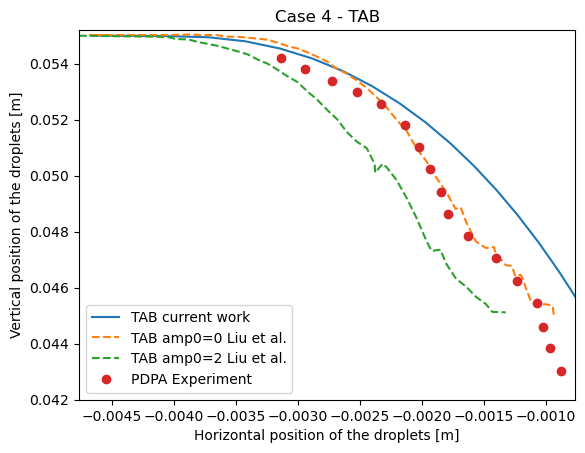

In [98]:
######################################
#####********Case 4 TAB**********#####
######################################
plt.plot(c_avgx,c_avgy, label='TAB current work')
plt.plot(TAB_amp00_Traject_Case4.iloc[:,0], TAB_amp00_Traject_Case4.iloc[:,1], '--', label='TAB amp0=0 Liu et al.')
plt.plot(TAB_amp02_Traject_Case4.iloc[:,0], TAB_amp02_Traject_Case4.iloc[:,1], '--', label='TAB amp0=2 Liu et al.')
plt.plot(Traject_Exp_Case4.iloc[:,0], Traject_Exp_Case4.iloc[:,1], 'o',label='PDPA Experiment')
plt.title('Case 4 - TAB')
plt.legend()
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Vertical position of the droplets [m]')
plt.xlim(-0.0047625, -0.0007625)
plt.ylim(0.042, 0.0552)

(0.042, 0.055)

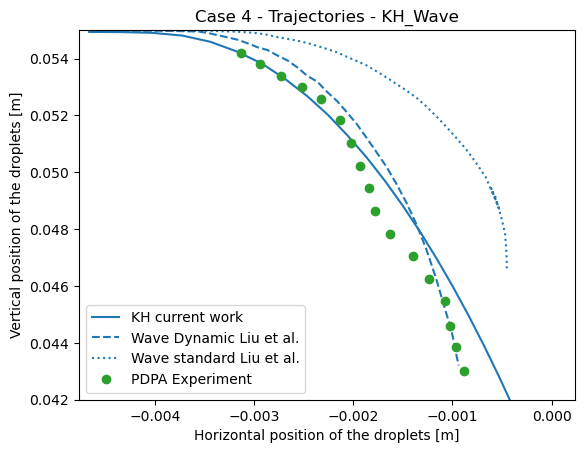

In [14]:
######################################
#####********Case 4 KH***********#####
######################################

plt.plot(c_avgx,c_avgy, label='KH current work')
plt.plot(Wave_Traject_Case4.iloc[:,0], Wave_Traject_Case4.iloc[:,1], '--', c='C0', label='Wave Dynamic Liu et al.')
plt.plot(Wave_st_Traject_Case4.iloc[:,0], Wave_st_Traject_Case4.iloc[:,1], ':', c='C0', label='Wave standard Liu et al.')
plt.plot(Traject_Exp_Case4.iloc[:,0], Traject_Exp_Case4.iloc[:,1], 'o', c='C2',label='PDPA Experiment')
plt.legend()
plt.title('Case 4 - Trajectories - KH_Wave')
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Vertical position of the droplets [m]')
plt.xlim(-0.0047625, 0.0002375)
plt.ylim(0.042,0.055)

(-0.0047625, 0.006)

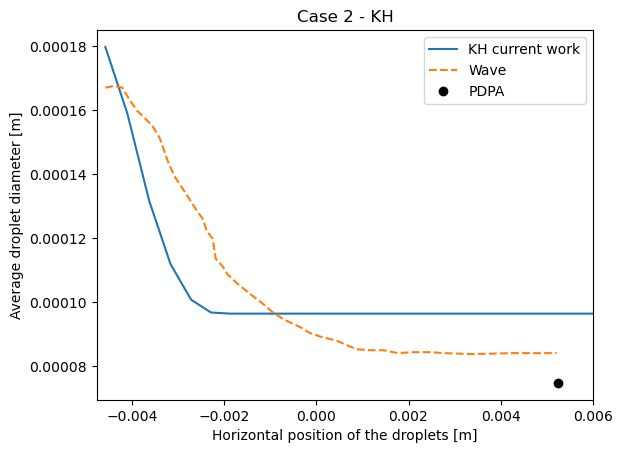

In [15]:
plt.plot(c_avgx,d_avg, label='KH current work')
plt.plot(data_Wave.iloc[:,0]-0.0007625, data_Wave.iloc[:, 1], '--', label='Wave')
#plt.plot(data_TAB.iloc[:,0]-0.0007625, data_TAB.iloc[:, 1], '--', label='TAB')
plt.plot(data_PDPA.iloc[:,0]-0.0007625, data_PDPA.iloc[:,1], 'ko', label='PDPA')
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Average droplet diameter [m]')
plt.title('Average droplet diameter over the horizontal penetration distance')
plt.legend()
plt.title('Case 2 - KH')
plt.xlim(-0.0047625,0.006)

(-0.0047625, 0.0057625)

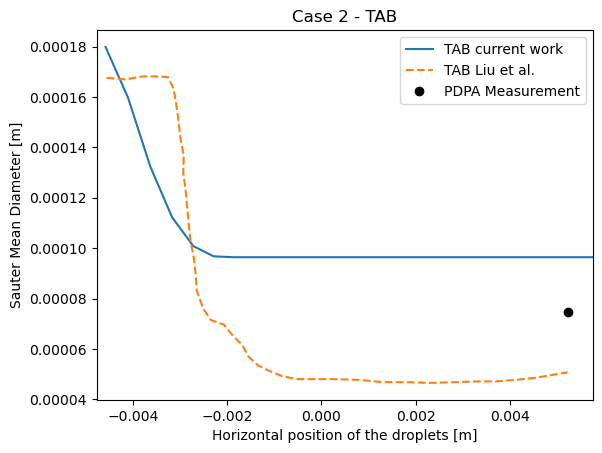

In [16]:
plt.plot(c_avgx,d32, label='TAB current work')
# plt.plot(data_Wave.iloc[:,0]-0.0007625, data_Wave.iloc[:, 1], '--', label='Wave Liu et al.')
plt.plot(data_TAB.iloc[:,0]-0.0007625, data_TAB.iloc[:, 1], '--', label='TAB Liu et al.')
plt.plot(data_PDPA.iloc[:,0]-0.0007625, data_PDPA.iloc[:,1], 'ko', label='PDPA Measurement')
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Sauter Mean Diameter [m]')
plt.legend()
plt.title('Case 2 - TAB')
plt.xlim(-0.0047625,0.0057625)


(-0.0047625, 0.0057625)

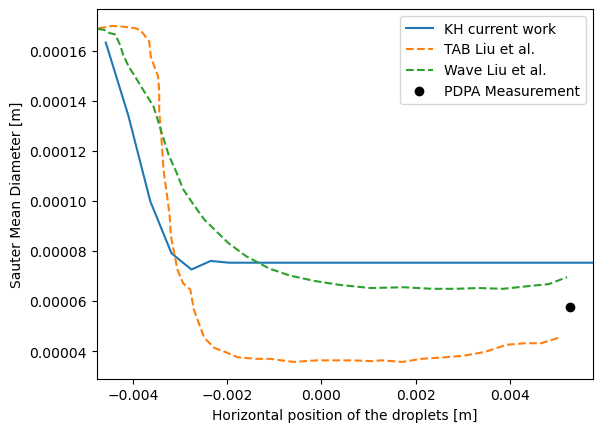

In [27]:
######################################
#####*******Case 3 KH/TAB********#####
######################################

plt.plot(c_avgx,d32, label='KH current work')
plt.plot(TAB_Case3.iloc[:,0]-0.0007625,TAB_Case3.iloc[:,1]/10, '--', label='TAB Liu et al.')
plt.plot(KH_Case3.iloc[:,0]-0.0007625,KH_Case3.iloc[:,1]/10, '--', label='Wave Liu et al.')
plt.plot(PDPA_Case3.iloc[:,0]-0.0007625,PDPA_Case3.iloc[:,1]/10, 'ko', label='PDPA Measurement')
plt.legend()
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Sauter Mean Diameter [m]')
plt.xlim(-0.0047625,0.0057625)

Text(0, 0.5, 'Droplet diameter [m]')

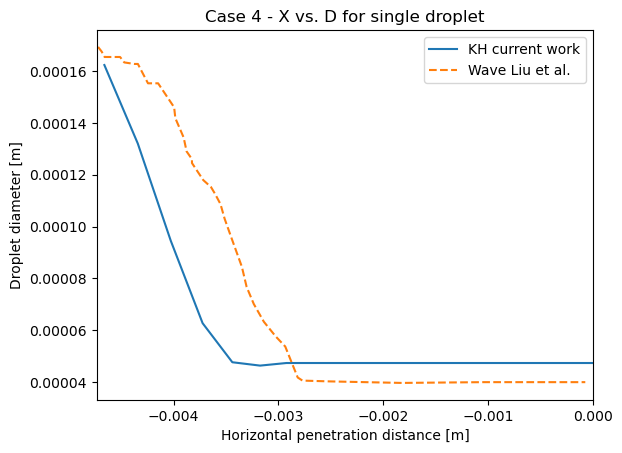

In [15]:
######################################
#####**********Case 4************#####
######################################
plt.plot(c_avgx,d_avg, label='KH current work')
#plt.plot(c_sorted[:,0],c_sorted[:,2],label='KH current work')
plt.plot(data_C4_SingleD.iloc[:,0]-0.0047325, data_C4_SingleD.iloc[:, 1]/1000000, '--', label='Wave Liu et al.')
#plt.plot(c_sorted[:,0],c_sorted[:,2], label='Simulation openFoam')
plt.xlim(-0.0047325,0.00)
plt.legend()
plt.title('Case 4 - X vs. D for single droplet')
plt.xlabel('Horizontal penetration distance [m]')
plt.ylabel('Droplet diameter [m]')

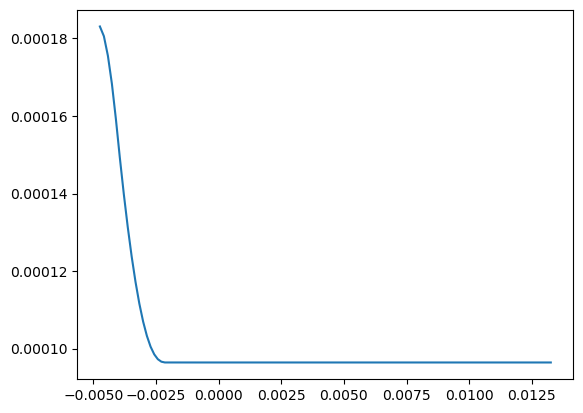

In [17]:
plt.plot(c_sorted[:,0],c_sorted[:,2])

In [ ]:
plt.plot(c_avgx,d_avg, label='KH current work')
plt.plot(data_C4_SingleRe.iloc[:,0],data_C4_SingleRe.iloc[:,1], '-', label='KH current work')
plt.legend()
plt.title('Case 3 - Sauter mean diameter (SMD)- KH_Wave vs. TAB')
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Reynolds number')
plt.xlim(0,0.005)